<a href="https://colab.research.google.com/github/Sundeepan-Sen/rate-of-return-calculator/blob/main/Calculating_the_Risk_of_a_Cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

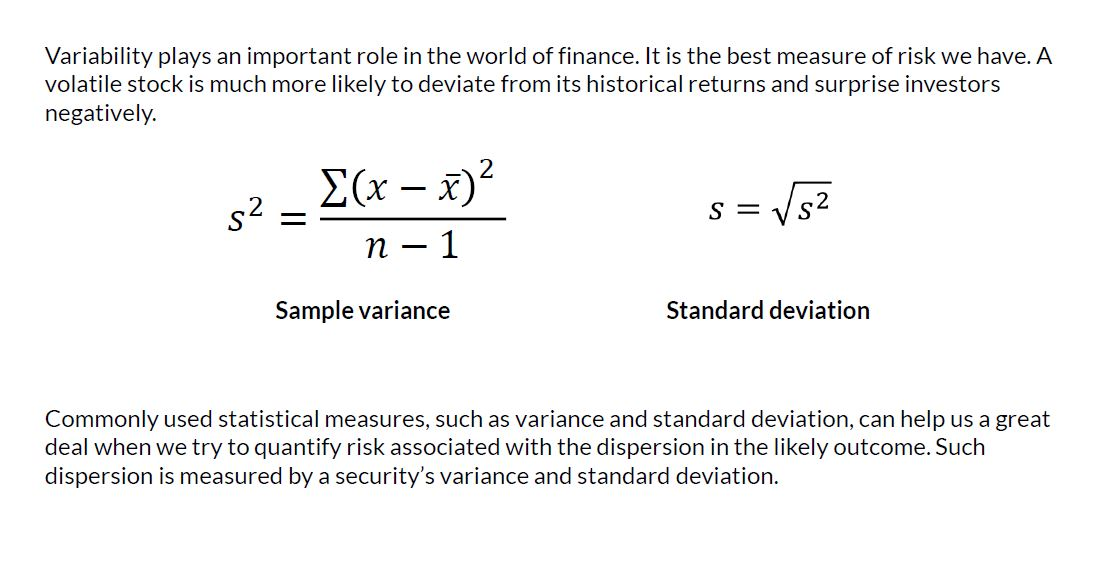


In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
# Any yahoo finance symbol will work here. 

symbols = ["ETH-USD",
           "BTC-USD",
           "DOGE-USD",
           "XRP-USD"]

TRADING_DAYS = 365.25

data = pd.DataFrame()

for symbol in symbols:
    data[symbols] = wb.DataReader(symbols, data_source='yahoo')['Adj Close']

In [137]:
print(data.tail())

                ETH-USD       BTC-USD  DOGE-USD   XRP-USD
Date                                                     
2021-04-28  2756.876953  53555.109375  0.305169  1.399360
2021-04-29  2773.207031  57750.175781  0.337561  1.591674
2021-04-30  2945.892822  57828.050781  0.392987  1.651025
2021-05-01  2952.056152  56631.078125  0.376046  1.562641
2021-05-03  3140.161133  58720.960938  0.392597  1.611373


In [3]:
returns = np.log(data / data.shift(1))

In [4]:
print(returns)

             ETH-USD   BTC-USD  DOGE-USD   XRP-USD
Date                                              
2016-05-03       NaN       NaN       NaN       NaN
2016-05-04  0.042869  0.002803 -0.017938 -0.020774
2016-05-05 -0.050025  0.025623  0.017938  0.032722
2016-05-06  0.002551 -0.002324 -0.008929  0.014121
2016-05-07  0.011926  0.000026 -0.004494 -0.013340
...              ...       ...       ...       ...
2021-04-28  0.003815 -0.023430 -0.058896  0.029559
2021-04-29  0.005906  0.075415  0.100881  0.128771
2021-04-30  0.060408  0.001348  0.152030  0.036610
2021-05-01  0.002090 -0.020916 -0.044065 -0.055019
2021-05-03  0.070227  0.015705  0.086577 -0.013119

[1822 rows x 4 columns]


In [5]:
returns.describe()

,ETH-USD,BTC-USD,DOGE-USD,XRP-USD
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.003195,0.002668,0.004123,0.003019
std,0.056375,0.040689,0.077432,0.072969
min,-0.550732,-0.464730,-0.515118,-0.616273
25%,-0.020424,-0.012685,-0.020769,-0.020650
50%,0.000996,0.002356,0.000000,-0.002094
75%,0.027431,0.019006,0.019185,0.019616
max,0.290145,0.225119,1.323469,1.027356


## Mean return of all Symbols

ETH-USD     0.003195
BTC-USD     0.002668
DOGE-USD    0.004123
XRP-USD     0.003019
dtype: float64


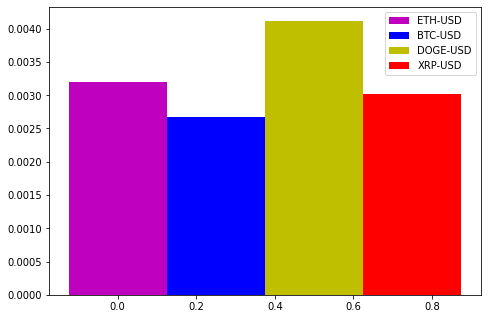

In [6]:
data = returns[symbols].mean()
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)

print(returns[symbols].mean())

ETH-USD     1.167017
BTC-USD     0.974418
DOGE-USD    1.505918
XRP-USD     1.102533
dtype: float64

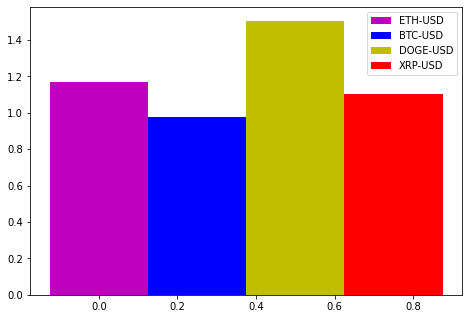

In [7]:
data = returns[symbols].mean() * TRADING_DAYS
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)
returns[symbols].mean() * TRADING_DAYS

###Daily risk:

ETH-USD     0.056375
BTC-USD     0.040689
DOGE-USD    0.077432
XRP-USD     0.072969
dtype: float64

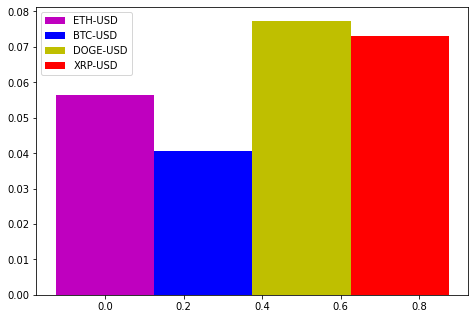

In [14]:
data = returns[symbols].std()
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)
returns[symbols].std()

### Annual risk:

ETH-USD     1.077307
BTC-USD     0.777756
DOGE-USD    1.479478
XRP-USD     1.394575
dtype: float64

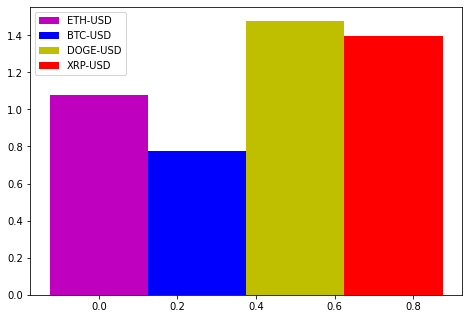

In [169]:
data = returns[symbols].std() * TRADING_DAYS ** 0.5
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)
returns[symbols].std() * TRADING_DAYS ** 0.5

Final Results:

ETH-USD     1.165321
BTC-USD     0.978536
DOGE-USD    1.497192
XRP-USD     1.111324
dtype: float64


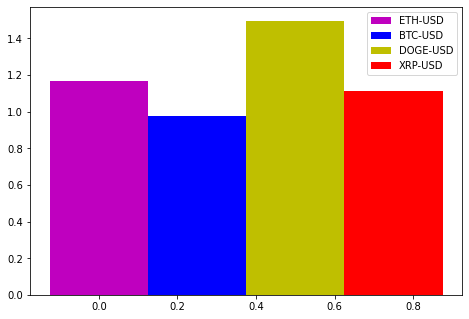

In [171]:
print (returns[symbols].mean() * TRADING_DAYS)
data = returns[symbols].mean() * TRADING_DAYS
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)


In [146]:
volatility = returns[symbols].std() * TRADING_DAYS ** 0.5
print(volatility)

ETH-USD     1.077307
BTC-USD     0.777756
DOGE-USD    1.479478
XRP-USD     1.394575
dtype: float64


In [147]:
plt.show(symbols, volatility)

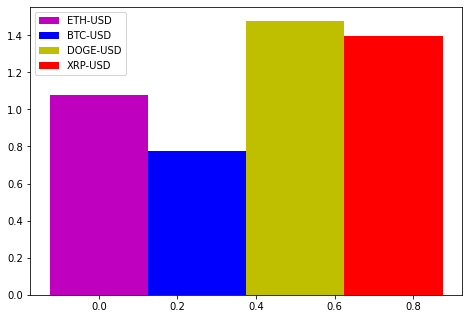

In [163]:
data = volatility
X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'm', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'y', width = 0.25)
ax.bar(X + 0.75, data[3], color = 'r', width = 0.25)
ax.legend(labels=symbols)

In [162]:
plt.scatter(volatility)

TypeError: ignored